## Multi-Armed Bandit

### Reference

- [ritvikmath Yt](https://www.youtube.com/watch?v=e3L4VocZnnQ)
- [CodeEmporium Yt](https://www.youtube.com/watch?v=QTZYOPiQTUc)
- [Code](https://github.com/ankonzoid/LearningX/blob/master/classical_RL/multiarmed_bandit/multiarmed_bandit.py)

### Problem Statement - Recommendation System

A person visits a restaurant, and the goal is to recommend a dish that maximizes his happiness. Each dish has an unknown happiness distribution, and the challenge is to train a model that learns to suggest the "happiest" food option.

- Environment: Person
- Agent: The Recommender System

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Seed
np.random.seed(0)

In [2]:
class Environment:

    def __init__(self, happiness_dist: list[list[int]]):
        self.happiness_dist = happiness_dist  # Parameters of happiness distribution for each arm

    def reward(self, action: int):
        # Emit happiness value based on the action
        mean = self.happiness_dist[action][0]
        std = self.happiness_dist[action][1]
        return np.random.normal(mean,std, 1)[0] # Happiness distribution follows a normal distribution

### How to Update Q ?

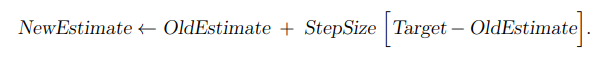

In [3]:
class Agent:

    def __init__(self, nActions: int, epsilon: float):
        
        self.nActions = nActions
        self.epsilon = epsilon
        self.n = np.zeros(nActions, dtype=int) # Number of times each action was chosen
        self.Q = np.zeros(nActions, dtype=float) # Value Q(a)

    def update_Q(self, action: int, reward: float):
        """Update Q (action, reward)"""
        self.n[action] += 1
        self.Q[action] = self.Q[action] + (1.0/self.n[action]) * (reward - self.Q[action])

    def select_action(self):
        """Select action based on epsilon-greedy strategy"""
        if np.random.random() < self.epsilon:
            return np.random.randint(self.nActions)
        else:
            return np.argmax(self.Q)

In [4]:
def experiment(happiness_dist: list[list[int]], N_steps: int, epsilon: float):

    env = Environment(happiness_dist) # Initialize environment
    agent = Agent(len(env.happiness_dist), epsilon) # Initialize agent

    actions, rewards = [], []
    for _ in range(N_steps):
        action = agent.select_action() # sample policy
        reward = env.reward(action) # Reward from environment
        agent.update_Q(action, reward) # update Q
        actions.append(action)
        rewards.append(reward)

    return np.array(actions), np.array(rewards), agent.Q

In [5]:
N_Experiments = 2000 # Number of experiments

N_steps = 500 # Number of steps
epsilon = 0.1 # Epsilon value for epsilon-greedy strategy
happy_dist = [[-10, 2], [-5, 1], [0, 5], [5, 2], [10, 3]] # Mean and standard deviation of happiness distribution for each arm

R = np.zeros(N_steps)

for _ in range(N_Experiments):

    actions, rewards, Q_value = experiment(happy_dist, N_steps, epsilon)
    R += rewards

# Normalize the reward
R_avg = R / N_Experiments

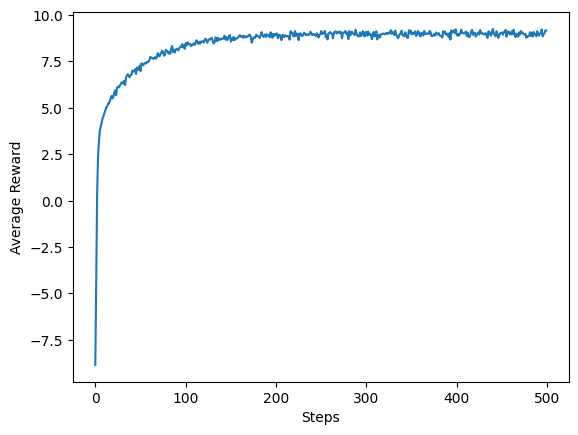

In [6]:
# Plot - Reward vs steps

plt.xlabel('Steps')
plt.ylabel('Average Reward')

plt.plot(R_avg)
plt.show()

In [7]:
# Results

total_reward = np.sum(R_avg)
maximum_reward = np.max([temp[0] for temp in happy_dist]) * N_steps

print(f'Total reward: {total_reward}')
print(f'Maximum possible reward: {maximum_reward}')
print(f'Q values: {Q_value}')
print(f'Optimal arm: {np.argmax([temp[0] for temp in happy_dist])}')

Total reward: 4220.82225474229
Maximum possible reward: 5000
Q values: [-10.64517516  -5.23363567  -0.18351036   5.3803147   10.09729506]
Optimal arm: 4
